In [44]:
#Weather Prediction

In [45]:
#importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
#reading dataset
data = pd.read_csv(r"C:\Users\user\Desktop\IOT\weather.csv")

In [47]:
#creating dataframe
df = pd.DataFrame(data)

In [48]:
#dropping nan values
df_dropped = df.dropna()
df_dropped

,read_dt,read_tm,condition,temperature,pressure,humidity,wind_direction,wind_speed,air_quality_health_index
2,2009-12-30,10:00:00,Light Rain,3.3,101.6,97.0,E,15.0,3.0
3,2009-12-30,11:00:00,Light Rain,3.3,101.7,97.0,E,9.0,3.0
4,2009-12-30,12:00:00,Light Rain,3.6,101.7,97.0,E,11.0,3.0
5,2009-12-30,12:35:00,Light Rain,3.9,101.7,97.0,E,15.0,2.0
6,2009-12-30,13:00:00,Light Rain,4.0,101.7,94.0,E,15.0,2.0
...,...,...,...,...,...,...,...,...,...
9761,2010-12-31,06:00:00,Clear,5.2,102.2,80.0,E,8.0,3.0
9762,2010-12-31,07:00:00,Clear,5.4,102.1,82.0,E,9.0,3.0
9763,2010-12-31,08:00:00,Partly Cloudy,5.3,102.1,78.0,E,9.0,3.0
9764,2010-12-31,09:00:00,Mainly Sunny,4.8,102.1,79.0,E,11.0,3.0


In [49]:
#changing categorical data features ( Condition , wind_direciton) to numerical features that the machine can understand it ( one hot encoding )
df_dropped  = pd.get_dummies(df_dropped,prefix=['read_dt','read_time','condition','wind_direction'],columns=['read_dt','read_tm','condition','wind_direction'])

#Dataset which will be used after data preparation
df_dropped

,temperature,pressure,humidity,wind_speed,air_quality_health_index,read_dt_2009-12-30,read_dt_2009-12-31,read_dt_2010-01-01,read_dt_2010-01-02,read_dt_2010-01-03,...,wind_direction_NNW,wind_direction_NW,wind_direction_S,wind_direction_SE,wind_direction_SSE,wind_direction_SSW,wind_direction_SW,wind_direction_W,wind_direction_WNW,wind_direction_WSW
2,3.3,101.6,97.0,15.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.3,101.7,97.0,9.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3.6,101.7,97.0,11.0,3.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,3.9,101.7,97.0,15.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,4.0,101.7,94.0,15.0,2.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9761,5.2,102.2,80.0,8.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9762,5.4,102.1,82.0,9.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9763,5.3,102.1,78.0,9.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9764,4.8,102.1,79.0,11.0,3.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
#Splitting Features and lables ( we will try to predict the 'air_quality_health_index')
from sklearn.model_selection import train_test_split
X = df_dropped.drop('air_quality_health_index', axis = 1)
y = np.array(df_dropped['air_quality_health_index'])

In [51]:
train_pct_index = int(0.80 * len(X))
X_train, X_test = X[:train_pct_index], X[train_pct_index:]
y_train, y_test = y[:train_pct_index], y[train_pct_index:]

In [52]:
#preparing random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)

In [53]:
#training model
rf.fit(X_train, y_train);

In [54]:
#making predictions on test set
predictions = rf.predict(X_test)
predictions = predictions.round()
#sort ettik
#predictions = np.sort(predictions)
#y_test = np.sort(y_test)

In [55]:
#Calculating errors
errors = abs(predictions - y_test)

In [56]:
#Mean absolute error
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 0.31 degrees.


In [57]:
#Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)

In [58]:
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 88.46 %.


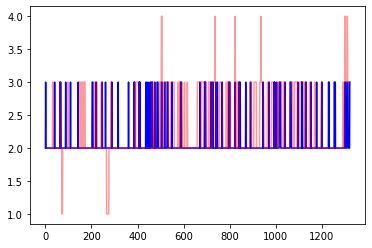

In [59]:
import matplotlib.pyplot as plt
plt.plot(range(len(predictions)),predictions,color  = "blue")
plt.plot(range(len(y_test)),y_test,color  = "red", alpha = 0.4)

In [62]:
#Naive bayes
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
from sklearn import metrics 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 4.00604686318972


In [65]:
#SVM
from sklearn.svm import SVC 
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test)
accuracy = svm_model_linear.score(X_test, y_test) 
accuracy

0.691609977324263